# Анализ исторических данных по продажам игр на различных платформах.

Анализ исторических данных по продажам игр на различных платформах.
Необходимо выявить определяющие успешность игры закономерности.
Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год.

Описание данных

• Name — название игры

• Platform — платформа

• Year_of_Release — год выпуска

• Genre — жанр игры

• NA_sales — продажи в Северной Америке

• EU_sales — продажи в Европе 

• JP_sales — продажи в Японии 

• Other_sales — продажи в других странах 

• Critic_Score — оценка критиков 

• User_Score — оценка пользователей

• Rating — рейтинг от организации ESRB.

### Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import numpy as np

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Подготовка данных

Заменим названия столбцов (приведем к нижнему регистру):

In [4]:
games.columns = games.columns.str.lower()

In [5]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
games.duplicated().sum()

0

Преобразуем данные в нужные типы:
Year_of_Release — год выпуска, из float64 в int64, потому что целые значения.
Critic_Score — оценка критиков, из float64 в int64, потому что целые значения.
User_Score — оценка пользователей, из object в float64, потому что дробные (с точкой) значения.

Чтобы поменять типы, сначала заполним пропуски.

In [8]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

name, year_of_release, genre мало пропусков - удаляем.

In [9]:
games.dropna(subset = ['year_of_release'], inplace = True)
games.dropna(subset=['name'], inplace = True)
games.dropna(subset=['genre'], inplace = True)

Найдем tbd и заменим на nan:

In [10]:
tbd = games.query('user_score == "tbd"')
tbd.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E


In [11]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan

Critic_Score — оценка критиков и User_Score — оценка пользователей, nan заменим на '-1'.

In [12]:
games['critic_score'] = games['critic_score'].fillna(-1)
games['user_score'] = games['user_score'].fillna(-1)

Rating — рейтинг от организации, nan заменим на Unknown.

In [13]:
games['rating'] = games['rating'].fillna('Unknown')

Меняем типы данных

In [14]:
games['year_of_release'] = games['year_of_release'].astype('int64')
games['critic_score'] = games['critic_score'].astype('int64')
games['user_score'] = games['user_score'].astype('float64')

In [15]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


Посчитаем суммарные продажи во всех регионах и запишу их в отдельный столбец.

In [17]:
games['sum_sales']=games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [18]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,Unknown,31.38


In [19]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  sum_sales        16444 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB


In [20]:
games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
sum_sales          0
dtype: int64

Пропуски заполнены, ещё раз выделим наши маркеры:

In [21]:
critic_score_mark = 'critic_score != -1'
user_score_mark = 'user_score != -1'
rating_mark = 'rating != "Unknown"'

Вывод: привели нашу таблицу в порядок.
1. Привели название столбцов к нижнему регистру.
2. Избавились от пропусков: удалили в столбцах - там где их очень мало.
3. Добавили отдельный столбец'sum_sales'.
4. Заменили тип данных.

In [22]:
# Посмотрим, что у нас осталось
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,' : кол-во 0', temp[temp[col_l] == 0][col_l].count(),
        ', процент 0', round(temp[temp[col_l] == 0][col_l].count()/len(temp)*100, 2),'%')
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  sum_sales        16444 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

Вывод: 
- name, year_of_release, genre мало пропусков - удаляем, это наверное человеческий фактор или технический сбой - отсутствие данных;
- Critic_Score — оценка критиков и User_Score — оценка пользователей, nan заменим на '-1'(заглушка), наверное не определились с оценкой и не поставили.

### Проведем исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы.

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt


Text(0, 0.5, 'Количество игр')

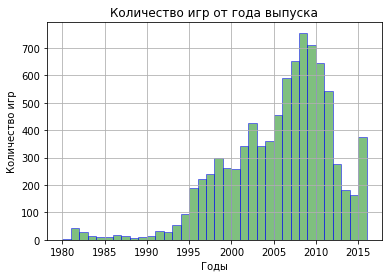

In [24]:
games_year = games.pivot_table(index='name', values='year_of_release', aggfunc='sum')
games_year.hist(bins=36, range=(1980,2016), ec='blue', alpha = 0.5, color='green')
plt.title('Количество игр от года выпуска')
plt.xlabel('Годы')
plt.ylabel('Количество игр')

Вывод: рост продаж начался в 1995 году и с 2010 года наблюдается спад, рассматривать совсем старые игры нецелесообразно, возьмём последний период в 5-10 лет.

Посмотрим, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и построим распределение по годам.

In [25]:
total_platform=games.pivot_table('sum_sales', index = 'platform', aggfunc='sum').sort_values(by='sum_sales', ascending = False)

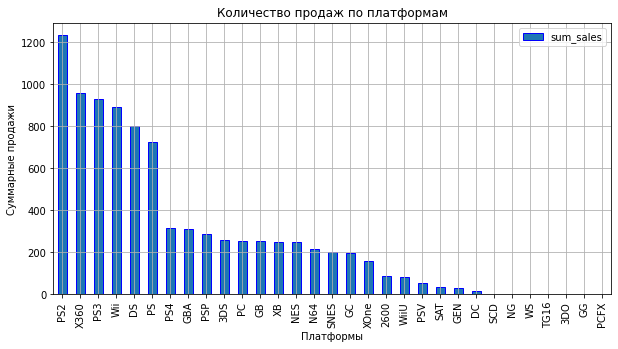

In [26]:
total_platform.plot(kind='bar',figsize=(10, 5), grid=True, ec='blue')
plt.title('Количество продаж по платформам')
plt.ylabel('Суммарные продажи')
plt.xlabel('Платформы')
plt.show()

Лидируют 6 платформ, построим по ним распределение по годам.

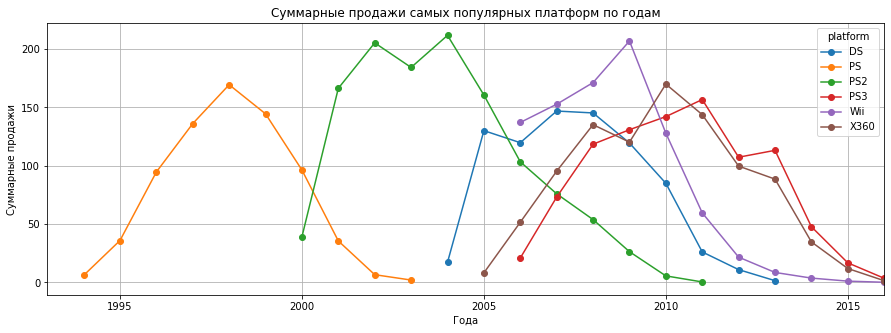

In [27]:
platform_best6 =total_platform.head(6).index.to_list()
platform_best6_pivot=games.query('platform.isin(@platform_best6)').pivot_table(index='year_of_release', 
                                                                            columns='platform', 
                                                                            values='sum_sales', 
                                                                            aggfunc='sum')
platform_best6_pivot.plot(grid=True, figsize=(15, 5), style ='o-')
plt.xlim(1993, 2016)
plt.title('Суммарные продажи самых популярных платформ по годам')
plt.ylabel('Суммарные продажи')
plt.xlabel('Года')
plt.show()

Вывод: По графику видим, что платформа появляется и исчезает в течение примерно 10 лет.
Таким образом для нашего прогноза целесообразно рассмотреть период с 2005 по 2015 годы, т.е те платформы которые набирают популярность, либо находятся на пике.

Возьмем данные после 2012 года. Основной фактор — эти данные помогут построить прогноз на 2017 год.

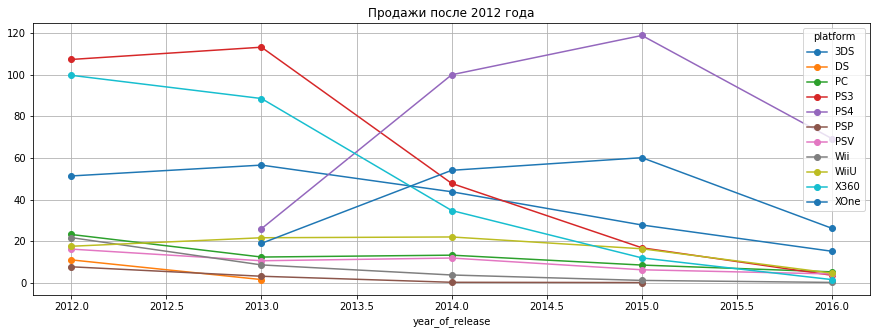

In [28]:
yers_after2012 = games.query('year_of_release >= 2012')
yers_after2012.pivot_table(index='year_of_release', 
                           columns='platform', 
                           values='sum_sales', 
                           aggfunc='sum').plot(grid=True, figsize=(15, 5), style ='o-')
plt.title('Продажи после 2012 года')
plt.show()
                    

Вывод: Продажи падают на всех платформах. Неплохие продажи после 2014 показывают только PS4 и XOne.

In [29]:
prom_platforms = yers_after2012.query('platform == "PS4" or platform == "XOne" or platform == "X360" or platform == "Wii" or platform == "WiiU"')
prom_platforms_stats = (prom_platforms.groupby(['platform','year_of_release'],as_index = False)['sum_sales'].sum()
                                 .sort_values('platform',ascending = False))
prom_platforms_stats

,platform,year_of_release,sum_sales
22,XOne,2016,26.15
21,XOne,2015,60.14
20,XOne,2014,54.07
19,XOne,2013,18.96
18,X360,2016,1.52
17,X360,2015,11.96
16,X360,2014,34.74
15,X360,2013,88.58
14,X360,2012,99.74
12,WiiU,2015,16.35


Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

[(0.0, 1.0)]

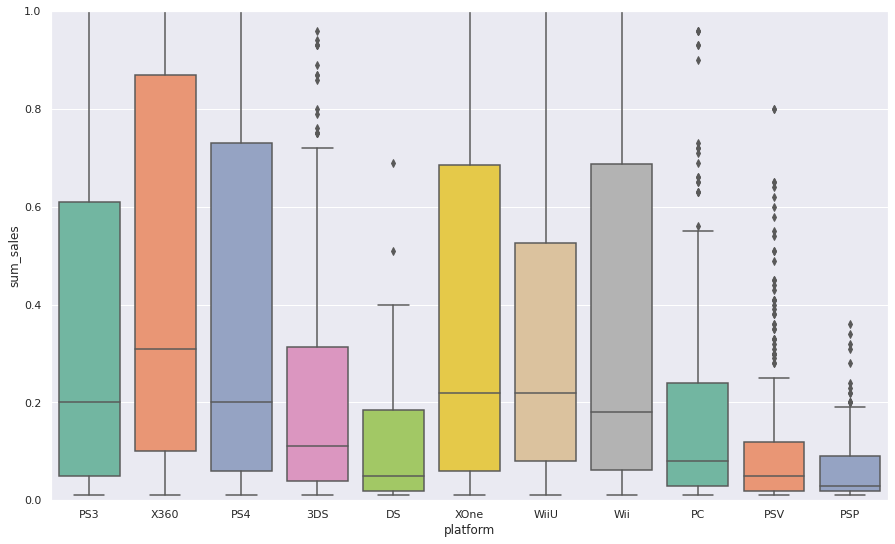

In [30]:
sns.set(rc={'figure.figsize':(15,9)})
ax = sns.boxplot(x="platform", y="sum_sales", data= yers_after2012, palette="Set2")
ax.set(ylim=(0,1))

Вывод: Медианные значения суммарных продаж, 3-ие квартили и максимальные значения платформ Х360, узкий "ящик" у платформы PSP.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. 

In [31]:
platform_best_user = games.query('platform == "PS4"')
ps4_f = platform_best_user.query(f"{user_score_mark}")
platform_best_user_loc = ps4_f.loc[:, ['user_score','sum_sales']]
display(platform_best_user_loc.corr())

,user_score,sum_sales
user_score,1.000000,-0.031957
sum_sales,-0.031957,1.000000


In [32]:
games.year_of_release.min()

1980

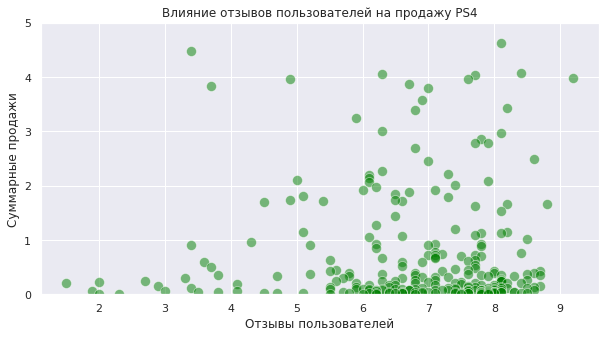

In [33]:
sns.set(rc={'figure.figsize':(10,5)}) 
ax = sns.scatterplot(x="user_score", y="sum_sales", data= ps4_f, 
                     alpha=0.5, color='green', s = 100)
ax.set(ylim=(0,5))
plt.ylabel('Суммарные продажи')
plt.xlabel('Отзывы пользователей')
plt.title('Влияние отзывов пользователей на продажy PS4')
plt.show()

Вывод: Корреляция в 0.03 говорит о том, что связь минимальна, т.е её почти нет. Но судя по графику можно сделать вывод, что чем выше оценка, тем больше продаж.

In [34]:
platform_best_critic = games.query('platform == "PS4"')
ps4_c = platform_best_user.query(f"{critic_score_mark}")
platform_best_critic_loc = ps4_c.loc[:, ['critic_score','sum_sales']]
display(platform_best_critic_loc.corr())

,critic_score,sum_sales
critic_score,1.000000,0.406568
sum_sales,0.406568,1.000000


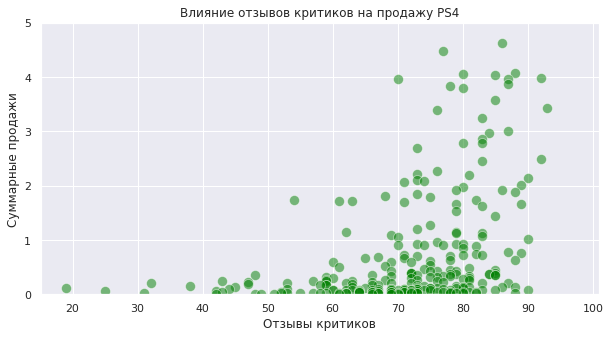

In [35]:
sns.set(rc={'figure.figsize':(10,5)}) 
ax = sns.scatterplot(x="critic_score", y="sum_sales", data= ps4_c, 
                     alpha=0.5, color='green', s = 100)
ax.set(ylim=(0,5))
plt.ylabel('Суммарные продажи')
plt.xlabel('Отзывы критиков')
plt.title('Влияние отзывов критиков на продажy PS4')
plt.show()

Вывод: Корреляция в 0,41 говорит о наличии связи, однако не слишком сильной. Но и тут по графику можно сделать вывод, что чем выше оценка, тем больше продаж.

Соотнесем выводы с продажами игр на других платформах.

In [36]:
ps4 = prom_platforms.query("platform == 'PS4'")
xone = prom_platforms.query("platform == 'XOne'")
x360 = prom_platforms.query("platform == 'X360'")
wii = prom_platforms.query("platform == 'Wii'")
wiiu = prom_platforms.query("platform == 'WiiU'")

In [37]:
ps4_f = ps4.query(f"{user_score_mark}")

In [38]:
features = ['user_score', 'critic_score', 'sum_sales']

cmap=sns.diverging_palette(240, 10, as_cmap=True)
ps4_f[features].corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '12pt'})\
    .set_precision(2)

,user_score,critic_score,sum_sales
user_score,1.00,0.39,-0.03
critic_score,0.39,1.00,0.35
sum_sales,-0.03,0.35,1.00


In [39]:
xone_f = xone.query(f"{user_score_mark}")

In [40]:
xone_f[features].corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '12pt'})\
    .set_precision(2)

,user_score,critic_score,sum_sales
user_score,1.00,0.25,-0.07
critic_score,0.25,1.00,0.33
sum_sales,-0.07,0.33,1.00


In [41]:
x360_f = x360.query(f"{user_score_mark}")
x360_f[features].corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '12pt'})\
    .set_precision(2)

,user_score,critic_score,sum_sales
user_score,1.00,0.38,0.01
critic_score,0.38,1.00,0.25
sum_sales,0.01,0.25,1.00


In [42]:
wii_f = wii.query(f"{user_score_mark}")
wii_f[features].corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '12pt'})\
    .set_precision(2)

,user_score,critic_score,sum_sales
user_score,1.00,0.38,0.30
critic_score,0.38,1.00,0.38
sum_sales,0.30,0.38,1.00


In [43]:
wiiu_f = wiiu.query(f"{user_score_mark}")
wiiu_f[features].corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '12pt'})\
    .set_precision(2)

,user_score,critic_score,sum_sales
user_score,1.00,0.60,0.40
critic_score,0.60,1.00,0.33
sum_sales,0.40,0.33,1.00


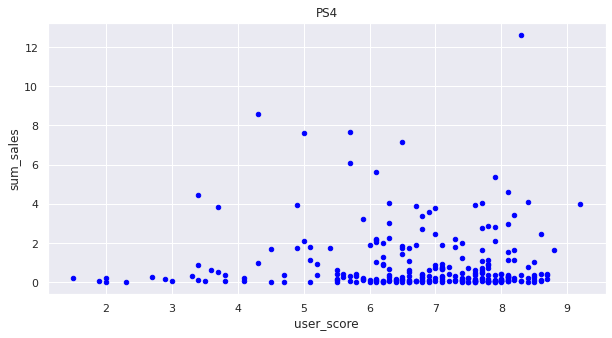

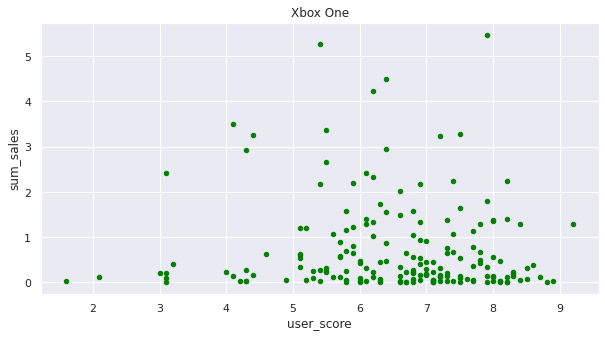

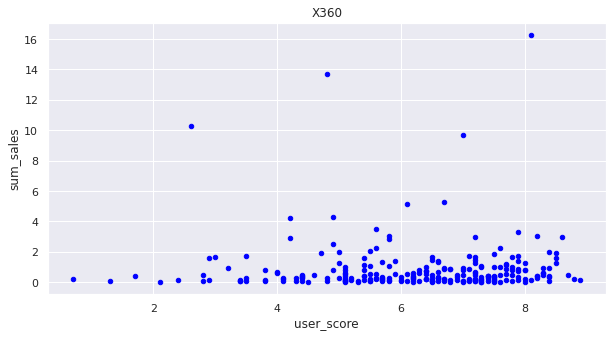

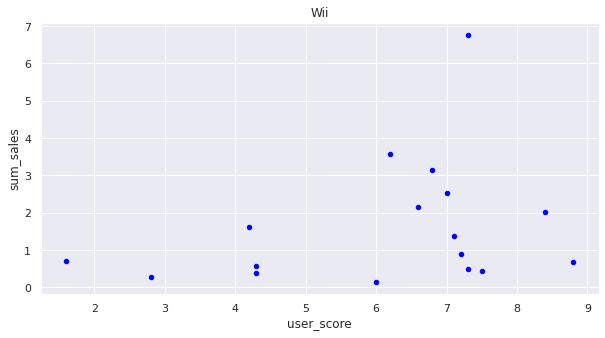

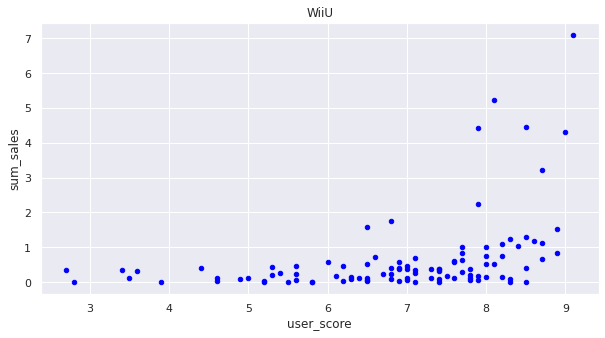

In [44]:
ps4_f.plot(x='user_score', y='sum_sales', kind='scatter', title='PS4',figsize=(10, 5), color='blue')
xone_f.plot(x='user_score', y='sum_sales', kind='scatter', title='Xbox One',figsize=(10, 5), color='green')
x360_f.plot(x='user_score', y='sum_sales', kind='scatter', title='X360',figsize=(10, 5), color='blue')
wii_f.plot(x='user_score', y='sum_sales', kind='scatter', title='Wii',figsize=(10, 5), color='blue')
wiiu_f.plot(x='user_score', y='sum_sales', kind='scatter', title='WiiU',figsize=(10, 5), color='blue')
plt.show()

In [45]:
ps4_cr = ps4.query(f"{critic_score_mark}")
xone_cr = xone.query(f"{critic_score_mark}")
x360_cr = x360.query(f"{critic_score_mark}")
wii_cr = wii.query(f"{critic_score_mark}")
wiiu_cr = wiiu.query(f"{critic_score_mark}")

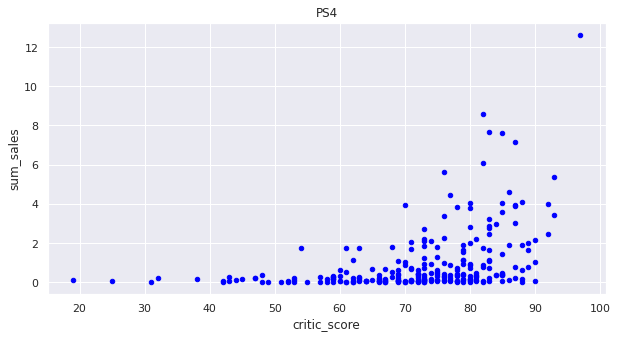

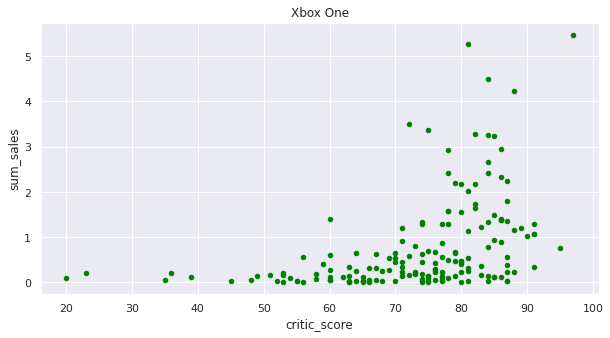

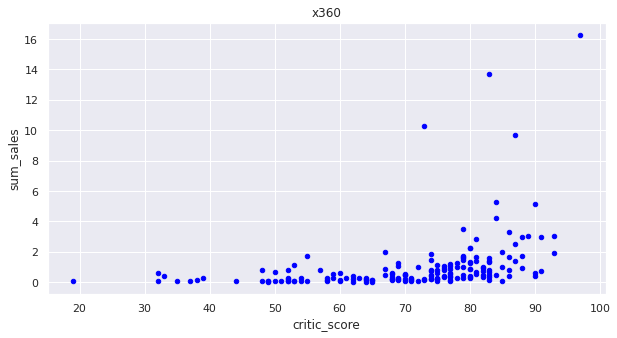

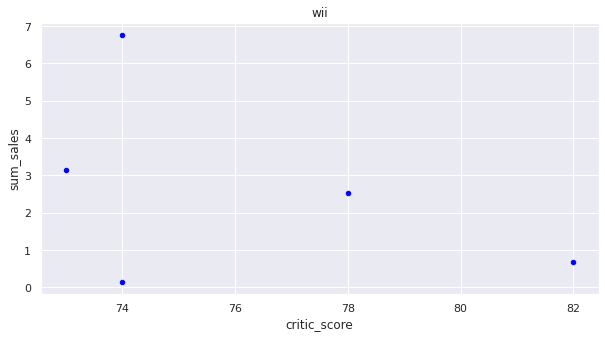

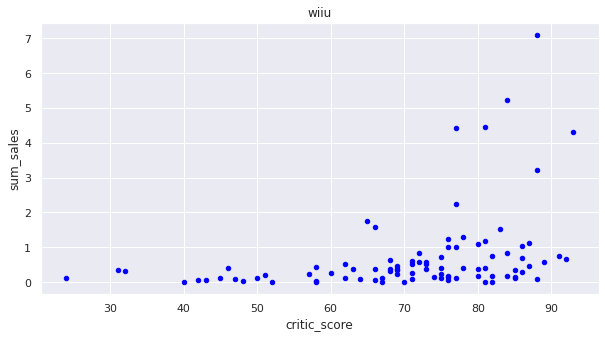

In [46]:
ps4_cr.plot(x='critic_score', y='sum_sales', kind='scatter', title='PS4',figsize=(10, 5), color='blue')
xone_cr.plot(x='critic_score', y='sum_sales', kind='scatter', title='Xbox One',figsize=(10, 5), color='green')
x360_cr.plot(x='critic_score', y='sum_sales', kind='scatter', title='x360',figsize=(10, 5), color='blue')
wii_cr.plot(x='critic_score', y='sum_sales', kind='scatter', title='wii',figsize=(10, 5), color='blue')
wiiu_cr.plot(x='critic_score', y='sum_sales', kind='scatter', title='wiiu',figsize=(10, 5), color='blue')
plt.show()

Вывод: Взаимосвязи между отзывами пользователей и продажами нет. Взаимосвязь между отзывами критиков и продажами существует, однако не слишком большая. Корреляция не говорит о причинно-следственной связи. И хотя по диаграммам рассеяния видим, что чем выше оценки критиков, тем выше продажи игр на всех платформах, мы не можем утверждать, что высокие оценки критиками приводят к высоким продажам игр.

Посмотрим на общее распределение игр по жанрам. 

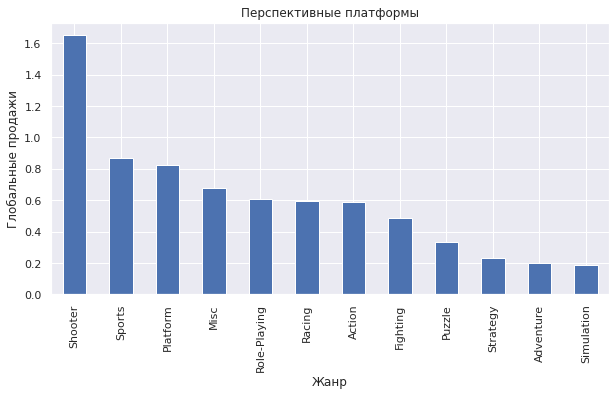

In [47]:
(prom_platforms
    .pivot_table(index='genre', values='sum_sales')
    .sort_values('sum_sales', ascending=False)
    .plot(kind='bar', y='sum_sales', figsize=(10, 5), legend=False,title = 'Перспективные платформы')
    .set(xlabel='Жанр', ylabel='Глобальные продажи'))

plt.show()

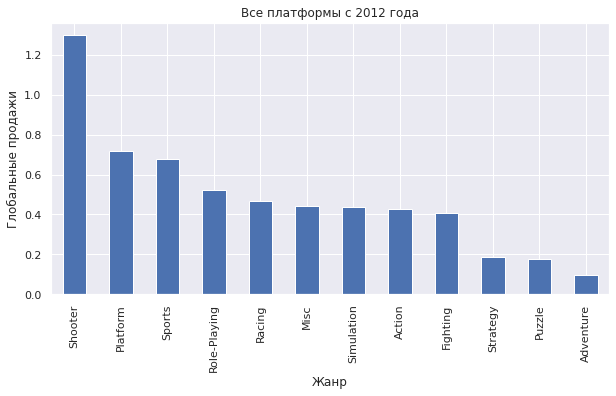

In [48]:
(yers_after2012
    .pivot_table(index='genre', values='sum_sales')
    .sort_values('sum_sales', ascending=False)
    .plot(kind='bar', y='sum_sales', figsize=(10, 5), legend=False,title = 'Все платформы с 2012 года')
    .set(xlabel='Жанр', ylabel='Глобальные продажи'))

plt.show()

Вывод: Самые популярные жанры ожидаемо - шутеры, спорт, гонки и рпг. 
Хуже всего продаются стратегии и квесты.
Если брать все платформы, то также популярен жанр "платформеры".

### Составьте портрет пользователя каждого региона

Самые популярные платформы (топ-5). 

In [49]:
regions = ['na_sales','eu_sales','jp_sales']
df_since2012=games.query('year_of_release >= 2012')
print("Суммарные продажи, млн.проданных копий в регионе")
for reg in regions:
    sum_region=df_since2012[reg].sum()     
    print(reg, round(sum_region))

Суммарные продажи, млн.проданных копий в регионе
na_sales 591
eu_sales 507
jp_sales 193


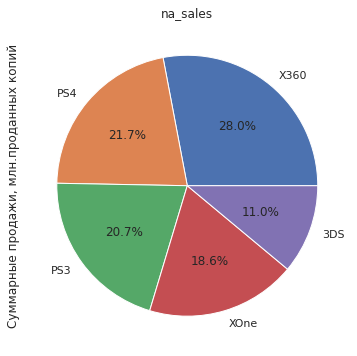

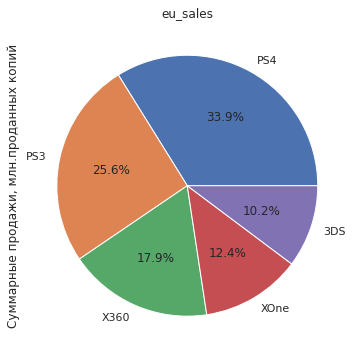

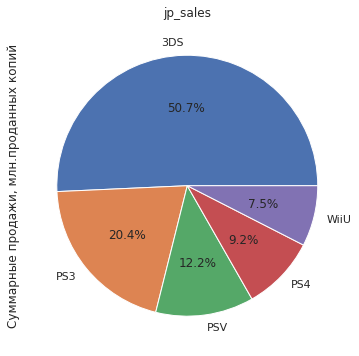

In [50]:
for reg in regions:
    (df_since2012.pivot_table(index='platform', values=reg, aggfunc='sum')
                .sort_values(reg, ascending=False).head(5)
                .plot(kind='pie', y=reg, figsize=(6, 6), legend=False, title = reg, autopct='%1.1f%%')
                .set(ylabel='Суммарные продажи, млн.проданных копий')
    )
    plt.show()

Вывод: Самая популярная в Северной Америке - X360, В Европе - PS4, в Японии c существенным отрывом- 3DS.

Самые популярные жанры (топ-5). 

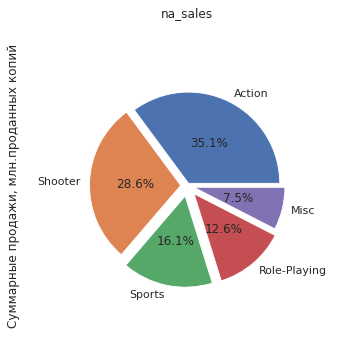

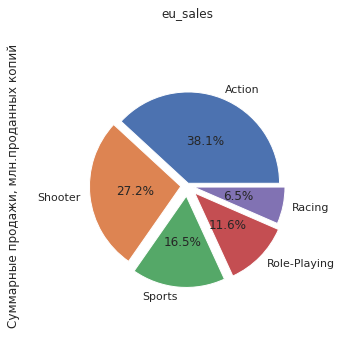

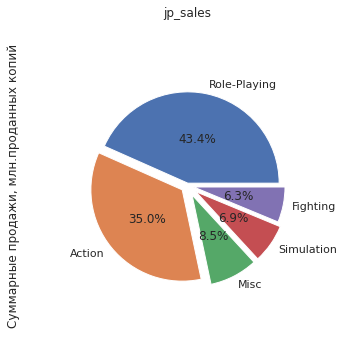

In [51]:
for reg in regions:
    (df_since2012.pivot_table(index='genre', values=reg, aggfunc='sum')
                .sort_values(reg, ascending=False).head(5)
                .plot(kind='pie', y=reg, figsize=(6, 6), legend=False, pctdistance=0.5, 
                      labeldistance=1.1, radius=0.7, title = reg, autopct='%1.1f%%', explode = [0.02, 0.05, 0.08, 0.08, 0.05])
                .set(ylabel='Суммарные продажи, млн.проданных копий')
    )
    plt.show()

Вывод: Самый популярный жанр в Северной Америке и в Европе - Action, а в Японии- Pole-Playing.

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

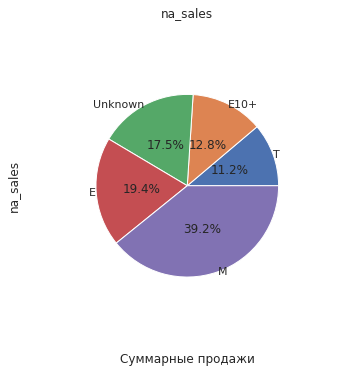

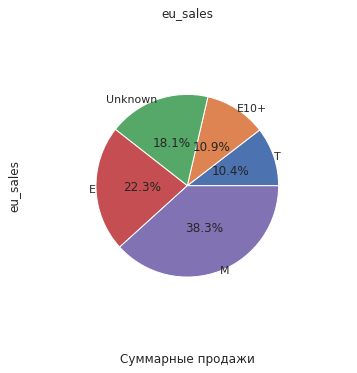

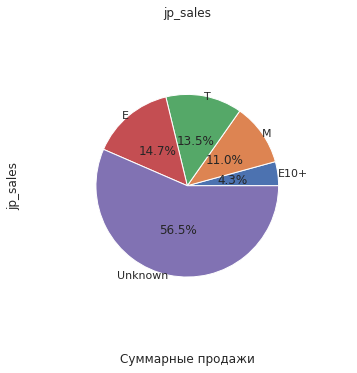

In [52]:

for reg in regions:
    (df_since2012.pivot_table(index='rating', values=reg, aggfunc='sum')
                .sort_values(reg, ascending=True).tail(5)
                .plot(kind='pie', y=reg, figsize=(6, 6), legend=False, pctdistance=0.5, 
                      labeldistance=1, radius=0.7, title = reg, autopct='%1.1f%%')
                .set(xlabel='Суммарные продажи')
    )
    plt.show()
    

Вывод: В Северной Америке и в Европе предпочитают рейтинги "Для взрослых", в Японии "Не определено".

### Проверьте гипотезы

In [53]:
from scipy import stats as st

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [54]:
user_score_xone= games.query('platform == "XOne" and user_score!="nan" and year_of_release >= 2012') 
user_score_pc = games.query('platform == "PC" and user_score!="nan" and year_of_release >= 2012') 
var_xone = np.var(user_score_xone['user_score'])
var_pc= np.var(user_score_pc['user_score'])
print('{:} {: >5.2f} '.format('Дисперсия платформ Xbox One равна:', var_xone))
print('{:} {: >11.2f} '.format('Дисперсия платформ PC равна:', var_pc ))

Дисперсия платформ Xbox One равна: 12.37 
Дисперсия платформ PC равна:       10.27 


Формулировки гипотез:

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Для проверки гипотезы возьмем стандартное значение alpha = 0.05

In [55]:
alpha = .05 

results = st.ttest_ind(
    user_score_xone['user_score'],
    user_score_pc['user_score'],
    equal_var= False  
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, т.е. средние пользовательские рейтинги платформ Xbox One и PC различаются!")
else:
    print("Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC одинаковы!")

p-значение: 0.05619765758385681
Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC одинаковы!


In [56]:
print('{:} {: >5.2f} '.format("Средний пользовательский рейтинг платформ Xbox One:", user_score_xone['user_score'].mean() ))
print('{:} {: >11.2f} '.format("Средний пользовательский рейтинг платформ PC:",user_score_pc['user_score'].mean() ))

Средний пользовательский рейтинг платформ Xbox One:  4.54 
Средний пользовательский рейтинг платформ PC:        5.12 


Вывод: Полученное значение p-value говорит о том, что хотя средние рейтинги платформ Xbox One и PC незначительно отличаются, с вероятностью в почти 7% такое различие можно получить случайно. Это явно слишком маленькая вероятность и рейтинг платформ  PC выше, чем Xbox One и наша гипотеза подтвердилась.

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [57]:
user_score_action= games.query('genre == "Action" and user_score!="nan" and year_of_release >= 2012') 
user_score_sports = games.query('genre == "Sports" and user_score!="nan" and year_of_release >= 2012') 
var_action = np.var(user_score_action['user_score'])
var_sports= np.var(user_score_sports['user_score'])
print('{:} {: >5.2f} '.format('Дисперсия жанра Action равна:', var_action))
print('{:} {: >5.2f} '.format('Дисперсия жанра Sports равна:', var_sports))

Дисперсия жанра Action равна: 16.26 
Дисперсия жанра Sports равна: 10.45 


Формулировки гипотез:

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

H1: Средние пользовательские рейтинги жанров Action и Sports разные.

In [58]:
alpha = .05

results = st.ttest_ind(
    user_score_action['user_score'],
    user_score_sports['user_score'],
    equal_var=False,  
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0020018209559324713
Отвергаем нулевую гипотезу


In [59]:
print('{:} {: >5.2f} '.format("Средний пользовательский рейтинг жанра Action:", user_score_action['user_score'].mean() ))
print('{:} {: >11.2f} '.format("Средний пользовательский рейтинг Sports:",user_score_sports['user_score'].mean() ))

Средний пользовательский рейтинг жанра Action:  2.97 
Средний пользовательский рейтинг Sports:        3.70 


Вывод:
Из имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.


### Общий вывод

Мы получили данные до 2016 года. Ознакомились с файлом: заметили пропуски и неверные типы данных в некоторых столбцах, обработали файл: изменили названия всех столбцов – привели всё к нижнему регистру, удалили 2 пропуска в столбцах "Name", "Year_of_Release", обнаружили некорректное значение "tbd" в столбце "user_score" заменили на пропуск, заменили пустые значения в столбцах ['user_score'] ,['critic_score'] ,['rating'] на удобное значение «0». Добавили отдельный столбе 'sum_sales' - суммарные продажи во всех регионах. Сделали замену типов данных столбцов на нужный формат.

Провели исследовательский анализ: Начинается наш период с 1980 года. До 1995 года продавались тяжело игры. После 1995 года наблюдается постепенный рост продаж. Примерно с 2008 года наблюдается уже спад. Жизненный цикл одной игры - 10 лет.  Определили актуальный период с 2005 года по 2015 год, т.к. данные за 2016 год могут быть неполными. За этот период наблюдается медленный спад актуальности платформ, и только рост 2 платформ - PS4 и XOne. Выделили 10 самых популярных игр: самая первая игра PS выпустилась в 1993 году, была на пике своей популярности в 98 году, и после выхода в 2000 году новых игр PS2 и GBA выдохлась к 2003 году, PS2 и GBA ждала та же участь- всё было ничего , особенно у PS2, пока не вышли Wii,X360, PS3 и самая менее популярная из этого списка- PSP. В 2013 году вышла новая игра - PS4, которая отняла всё внимание игроманов и уже в 2015 году ей не было равных. Но можем предположить, что и её популярность будет падать.

Построилиграфик «ящик с усами» по глобальным продажам игр в разбивке по платформам и выявили, что медианные значения суммарных продаж данных платформ сильно не отличаются, 3-ие квартили и максимальные значения платформ X360 и PS3, PS занимают самые высокие позиции по сравнению с остальными платформами, самый большой выброс значений и низкий 3-ий квартиль у платформы DС. В среднем продажи коррелируют больше с оценкой критиков (в случае, когда оценка критиков выше 50), нежели с оценкой пользователей.

Составили портреты пользователей из каждого региона: Средне-статистический пользователь из Северной Америки пользуется, в основном, платформами X360 и PS4, предпочитает игровые жанры "Action" и "Shoter" и игры с рейтингом "Для взрослых".

Средне-статистический пользователь из Европы предпочитает платформы PS4 и PS3, жанры "Action" и "Shoter" и игры с рейтингом "Для взрослых".

Средне-статистический пользователь из Японии отдает своё предпочтение платформе 3DS, жанру "Role-Playing" и "Action", рейтингу "Для всех".

Планируемая кампания на 2017-й:
1. Так как мы заметили, что жизненный цикл игр -10 лет и по графикам, что все игры на данный момент находятся на стадии спада своей популярности. Считаем, что здесь наибольшая вероятность "оживить" продажу можно - платформу PS4 (дата выхода 2013). По свежести дате выхода предыдущие игры X360, PS3 уже старые.
2. Предлагаем принять разные стратегии по повышению продаж в регионах в зависимости от актуальных параметров игр, т.е. использовать портреты средне-статистического пользователя каждого региона.Принять важное замечание, что больше половины продаж сделано в Северной Америке. 
3. Предлагаем выпустить новую игру, например, PS5 на базе платформы X360 и PS4 c жанром "Action" и "Sports", рейтингом "Для взрослых" и запустить продажу в Северной Америке и Европе. Для Японии выпустить больше игр на платформе 3DS, жанру Role-Playing, рейтингу "Для всех", но при этом использовать рекламные акции о популярных платформах в других регионах для ознакомления.